**Introduction**: quelques mots à propos du fonctionnement d'un notebook Jupyter 
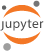
- un notebook est une suite de cellules ; certaines cellules (comme celle-ci et la suivante) contiennent du texte, et d'autres contiennent du code Python (comme les cellules repérées par "In [ ]" ci-dessous)
- une cellule de code peut être exécutée en la sélectionnant (cliquer à l'intérieur) puis en cliquant sur le bouton "Run" de la barre d'outils ci-dessous (alternativement on peut utiliser le raccourci "Shift-Enter") ; les exécutées exécutée sont nommées "In [1]", "In [2]", etc.
- une fois une cellule exécutée, son résultat s'affiche sous la cellule (messages éventuellement affichés par le code, valeur retournée par la dernière ligne)
- il est possible de modifier n'importe quelle cellule de code : cliquer à l'intérieur pour commencer à éditer le texte
- les lignes de code commençant par # sont des commentaires (en vert) contenant certaines explications à propos du code
- les valeurs des variables, les définitions de fonctions, etc. sont conservées en mémoire et disponibles pour les exécutions suivantes (au sein du *Kernel* d'exécution)
- le menu et la barre d'outils ci-dessus permettent d'effectuer d'autres actions : sauvegarder le notebook, modifier/déplacer les cellules, lancer l'exécution de toutes les cellules d'un coup, redémarrer le kernel, etc.

**Un exemple simple de problème d'optimisation linéaire**

Pour reprendre l'exemple du cours (allocation de ressources pour la fabrication de portes et tables), si on considère un problème à deux variables $x_1$, $x_2$ positives ou nulles, où on souhaite maximiser la quantité $3x_1+5x_2$ sous les contraintes que $x1\le 4$, $2 x_2\le 12$ et $3x_1+2x_2 \le 18$, ce qui correspond à la formulation complète suivante $$\max_{x_1 \ge 0, x_2 \ge 0} 3x_1+5x_2 \text{ tel que } \left\{\begin{array}{l} x1\le 4,\\ 2 x_2\le 12,\\3x_1+2x_2 \le 18 \end{array}\right.$$ on procède comme ceci pour résoudre avec le solveur *linprog* fourni par scipy :

In [1]:
# 0. Préparation : chargement des modules numpy et linprog de scipy
import numpy as np
from scipy.optimize import linprog 

# 1. Variables : vecteur x = (x1,x2)

# Bornes sur les variables : 

## Pour x1 : 0 <= x1 <= 4 
x1_bounds = (0, 4)

## Pour x2 : 0 <= x2 
x2_bounds = (0,  np.inf) 
# NB : si on ne souhaite pas borner (ou borner d'un seul côté), utiliser des bornes infinies à l'aide de -np.inf et np.inf
# (ici on aurait bien sûr pu déduire x2 <= 6, mais pour l'exemple on garde cette contrainte sous la forme d'origine)

# 2. Fonction objectif = c^T x avec c = (-3,-5)
# NB: au lieu de maximiser 3x1+5x2 on minimise -3x1-5x2, ce qui est équivalent
c = [-3, -5]

# 3. Contraintes : ici de la forme A x <= b 
# avec la matrice A = (0 2) et le vecteur b (12)
#                     (3 2)                 (18) 

A = [[0,2],[3, 2]]
b = [12,18]

# A propos des dimensions : 
# - on a n=2 variables = longueur du vecteur c = #colonnes de A 
# - on a m=2 variables = longueur du vecteur b = #lignes de A 

# 4. Résolution proprement dite du problème 

# On résout min c^T x tel que A x <= b et 0 <= x <= (4,6) à l'aide de cet appel
res = linprog(c, A_ub=A, b_ub=b, bounds=(x1_bounds, x2_bounds), options={"disp": False})

print("La solution (x1,x2) est ",res.x) # On retrouve bien la solution x=(2,6) qu'on avait trouvée graphiquement

La solution (x1,x2) est  [2. 6.]


In [2]:
# Modifions le membre de droite de la seconde contrainte (de 18 à 17)
b[1]=17
# et résolvons à nouveau (cette fois en demandant au solver d'afficher des détaisl sur la résolution)
res = linprog(c, A_ub=A, b_ub=b, bounds=(x1_bounds, x2_bounds), options={"disp": True})

print("La solution (x1,x2) est ",res.x) # On retrouve bien la solution non entière qu'on avait trouvée graphiquement

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 -8.0                
0.1374881564222     0.1374881564222     0.1374881564222     0.8764152307421  0.1374881564222     -26.39999752079     
0.01923233724811    0.0192323372481     0.0192323372481     0.8691770593007  0.0192323372481     -33.45061112704     
3.140195022699e-06  3.140194933828e-06  3.14019493405e-06   0.9998529339101  3.140194860351e-06  -34.99978831616     
1.570091542989e-10  1.570092852144e-10  1.570091358514e-10  0.9999500001469  1.570097763761e-10  -34.99999998942     
Optimization terminated successfully.
         Current function value: -35.000000  
         Iterations: 4
La solution (x1,x2) est  [1.66666667 6.        ]


NB : le code linprog actuellement disponible dans scipy ne permet de résoudre que des problèmes linéaires en variables continues (pas de variables entières ou binaires). Pour résoudre de tels problèmes il faut utiliser un autre package, comme *cvxopt* par exemple (via sa fonction *glpk.ilp*) ou le module *mip* (https://www.python-mip.com/).

In [3]:
# Pour information, toutes les options disponibles avec le solver lingprog de scipy :
from scipy.optimize import show_options
show_options('linprog')



simplex

Linear programming: minimize a linear objective function subject to linear
equality and inequality constraints using the tabluea-based simplex method.

Linear programming solves problems of the following form:

.. math::

    \min_x \ & c^T x \\
    \mbox{such that} \ & A_{ub} x \leq b_{ub},\\
    & A_{eq} x = b_{eq},\\
    & l \leq x \leq u ,

where :math:`x` is a vector of decision variables; :math:`c`,
:math:`b_{ub}`, :math:`b_{eq}`, :math:`l`, and :math:`u` are vectors; and
:math:`A_{ub}` and :math:`A_{eq}` are matrices.

Alternatively, that's:

minimize::

    c @ x

such that::

    A_ub @ x <= b_ub
    A_eq @ x == b_eq
    lb <= x <= ub

Note that by default ``lb = 0`` and ``ub = None`` unless specified with
``bounds``.

Parameters
----------
c : 1-D array
    The coefficients of the linear objective function to be minimized.
A_ub : 2-D array, optional
    The inequality constraint matrix. Each row of ``A_ub`` specifies the
    coefficients of a linear inequality cons